# 데이터 준비<a href="#데이터-준비" class="anchor-link">¶</a>

## 데이터 가져오기<a href="#데이터-가져오기" class="anchor-link">¶</a>

In \[3\]:

    from sklearn.datasets import load_wine
    import numpy as np
    data = load_wine()
    X = data.data
    Y = data.target
    features_names = data.feature_names

    #성능이 너무 잘나와서 일부 조정
    idx = np.random.choice(range(len(Y)), 15, replace = False)
    Y[idx] = 2 - Y[idx]

## 이진 분류 데이터 생성<a href="#이진-분류-데이터-생성" class="anchor-link">¶</a>

In \[4\]:

    b_X = X[Y!=2]
    b_Y = Y[Y!=2]

## 다중 데이터 분할<a href="#다중-데이터-분할" class="anchor-link">¶</a>

In \[5\]:

    from sklearn.model_selection import train_test_split
    Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size = 0.7, shuffle = True)
    print("len(Train_X) / len(X):{}".format(len(Train_X) / len(X)))

    Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size = 100, shuffle = True)
    print("len(Train_X):{}".format(len(Train_X)))

    len(Train_X) / len(X):0.6966292134831461
    len(Train_X):100

## 이진 데이터 분할<a href="#이진-데이터-분할" class="anchor-link">¶</a>

In \[10\]:

    from sklearn.model_selection import train_test_split
    b_Train_X, b_Test_X, b_Train_Y, b_Test_Y = train_test_split(b_X, b_Y, train_size = 0.7, shuffle = True)

# 모델<a href="#모델" class="anchor-link">¶</a>

## 주요 메서드<a href="#주요-메서드" class="anchor-link">¶</a>

-   fit(X, y\[, sample_weight\]): Build a forest of trees from the
    training set (X, y).
-   get_params(\[deep\]): Get parameters for this estimator.
-   predict(X): Predict class for X.
-   predict_log_proba(X):Predict class log-probabilities for X.
-   predict_proba(X): Predict class probabilities for X.
-   score(X, y\[, sample_weight\]): Return the mean accuracy on the
    given test data and labels.

## SVM<a href="#SVM" class="anchor-link">¶</a>

### 함수<a href="#함수" class="anchor-link">¶</a>

#### 분류<a href="#분류" class="anchor-link">¶</a>

sklearn.svm.SVC(\*, C=1.0, kernel='rbf', degree=3, gamma='scale',
coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200,
class_weight=None, verbose=False, max_iter=- 1,
decision_function_shape='ovr', break_ties=False, random_state=None)

-   C, default=1.0 Regularization parameter. The strength of the
    regularization is inversely proportional to C. Must be strictly
    positive. The penalty is a squared l2 penalty.  
      

-   kernel: {'linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’},
    default=’rbf’ Specifies the kernel type to be used in the algorithm.
    It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
    or a callable. If none is given, ‘rbf’ will be used. If a callable
    is given it is used to pre-compute the kernel matrix from data
    matrices; that matrix should be an array of shape (n_samples,
    n_samples).  
      

-   degree: int, default=3 Degree of the polynomial kernel function
    (‘poly’). Ignored by all other kernels.  
      

-   gamma: {‘scale’, ‘auto’} or float, default=’scale’ Kernel
    coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.  
      

-   class_weight: dict or ‘balanced’, default=None Set the parameter C
    of class i to class_weight\[i\]*C for SVC. If not given, all classes
    are supposed to have weight one. The “balanced” mode uses the values
    of y to automatically adjust weights inversely proportional to class
    frequencies in the input data as n_samples / (n_classes*
    np.bincount(y))  

#### 예측<a href="#예측" class="anchor-link">¶</a>

sklearn.svm.SVR(\*, kernel='rbf', degree=3, gamma='scale', coef0=0.0,
tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200,
verbose=False, max_iter=- 1)

-   epsilon: float, default=0.1 Epsilon in the epsilon-SVR model. It
    specifies the epsilon-tube within which no penalty is associated in
    the training loss function with points predicted within a distance
    epsilon from the actual value.

### 특징 중요도 계산 (kernel이 linear일때만 가능)<a href="#특징-중요도-계산-(kernel이-linear일때만-가능)" class="anchor-link">¶</a>

In \[20\]:

    from matplotlib import pyplot as plt
    from sklearn import svm
    import pandas as pd

    model = svm.SVC(kernel='linear')
    model.fit(b_Train_X, b_Train_Y)

    feature_importance = abs(model.coef_)[0] # 특징 중요도 계산
    pd.Series(feature_importance, index = features_names).sort_values().plot(kind = "barh")

Out\[20\]:

    <matplotlib.axes._subplots.AxesSubplot at 0x227cfd498d0>

## Random Forest<a href="#Random-Forest" class="anchor-link">¶</a>

### 함수<a href="#함수" class="anchor-link">¶</a>

#### 분류<a href="#분류" class="anchor-link">¶</a>

sklearn.ensemble.RandomForestClassifier(n_estimators=100, \*,
criterion='gini', max_depth=None, min_samples_split=2,
min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None,
bootstrap=True, oob_score=False, n_jobs=None, random_state=None,
verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0,
max_samples=None)

주요 파라미터

-   n_estimators int, default=100 The number of trees in the forest.

-   criterion {“gini”, “entropy”}, default=”gini” The function to
    measure the quality of a split. Supported criteria are “gini” for
    the Gini impurity and “entropy” for the information gain. Note: this
    parameter is tree-specific.

주요 attributes

-   base_estimator(underbar): DecisionTreeClassifier The child estimator
    template used to create the collection of fitted sub-estimators.

-   estimators\_: list of DecisionTreeClassifier The collection of
    fitted sub-estimators.

-   classes\_: ndarray of shape (n_classes,) or a list of such arrays
    The classes labels (single output problem), or a list of arrays of
    class labels (multi-output problem).

#### 예측<a href="#예측" class="anchor-link">¶</a>

sklearn.ensemble.RandomForestRegressor(n_estimators=100, \*,
criterion='mse', max_depth=None, min_samples_split=2,
min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None,
bootstrap=True, oob_score=False, n_jobs=None, random_state=None,
verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None

주요 파라미터 (나머지는 분류와 동일)

-   criterion{“mse”, “mae”}, default=”mse”

In \[22\]:

    from sklearn.ensemble import RandomForestClassifier as RFC
    model = RFC(n_estimators = 5).fit(b_Train_X, b_Train_Y)
    print(model.base_estimator_)
    print(model.estimators_)

    DecisionTreeClassifier()
    [DecisionTreeClassifier(max_features='auto', random_state=1810377447), DecisionTreeClassifier(max_features='auto', random_state=1026144869), DecisionTreeClassifier(max_features='auto', random_state=1430850948), DecisionTreeClassifier(max_features='auto', random_state=1771444481), DecisionTreeClassifier(max_features='auto', random_state=1191330562)]

### 특징 중요도 계산<a href="#특징-중요도-계산" class="anchor-link">¶</a>

In \[23\]:

    model.feature_importances_

Out\[23\]:

    array([0.08010114, 0.0111253 , 0.01710424, 0.06492083, 0.12780839,
           0.        , 0.24961402, 0.05613322, 0.        , 0.08632308,
           0.05199839, 0.05555823, 0.19931318])

In \[27\]:

    pd.Series(model.feature_importances_,
              index = features_names).sort_values(ascending = True).plot(kind = "barh")

Out\[27\]:

    <matplotlib.axes._subplots.AxesSubplot at 0x227d204b710>

![](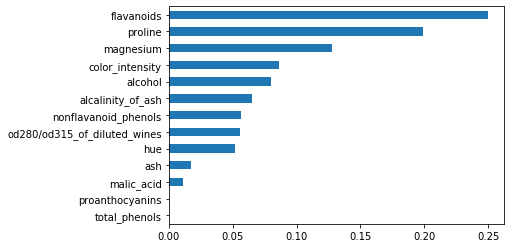%0A)

## LightGBM<a href="#LightGBM" class="anchor-link">¶</a>

### 함수<a href="#함수" class="anchor-link">¶</a>

#### 분류<a href="#분류" class="anchor-link">¶</a>

lightgbm.LGBMClassifier(boosting_type='gbdt', num_leaves=31, max_depth=-
1, learning_rate=0.1, n_estimators=100, subsample_for_bin=200000,
objective=None, class_weight=None, min_split_gain=0.0,
min_child_weight=0.001, min_child_samples=20, subsample=1.0,
subsample_freq=0, colsample_bytree=1.0, reg_alpha=0.0, reg_lambda=0.0,
random_state=None, n_jobs=- 1, silent=True, importance_type='split',
\*\*kwargs)

주요 파라미터

-   num_leaves (int, optional (default=31)) – Maximum tree leaves for
    base learners.
-   max_depth (int, optional (default=-1)) – Maximum tree depth for base
    learners, \<=0 means no limit.
-   learning_rate (float, optional (default=0.1)) – Boosting learning
    rate. You can use callbacks parameter of fit method to shrink/adapt
    learning rate in training using reset_parameter callback. Note, that
    this will ignore the learning_rate argument in training.
-   n_estimators (int, optional (default=100)) – Number of boosted trees
    to fit.

#### 예측<a href="#예측" class="anchor-link">¶</a>

lightgbm.LGBMRegressor(boosting_type='gbdt', num_leaves=31, max_depth=-
1, learning_rate=0.1, n_estimators=100, subsample_for_bin=200000,
objective=None, class_weight=None, min_split_gain=0.0,
min_child_weight=0.001, min_child_samples=20, subsample=1.0,
subsample_freq=0, colsample_bytree=1.0, reg_alpha=0.0, reg_lambda=0.0,
random_state=None, n_jobs=- 1, silent=True, importance_type='split',
\*\*kwargs)

In \[31\]:

    from lightgbm import LGBMClassifier
    model = LGBMClassifier(n_estimators = 5).fit(b_Train_X, b_Train_Y)

### 특징 중요도 계산<a href="#특징-중요도-계산" class="anchor-link">¶</a>

In \[32\]:

    model.feature_importances_

Out\[32\]:

    array([5, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 3])

In \[33\]:

    pd.Series(model.feature_importances_,
              index = features_names).sort_values(ascending = True).plot(kind = "barh")

Out\[33\]:

    <matplotlib.axes._subplots.AxesSubplot at 0x227d2032e80>

![](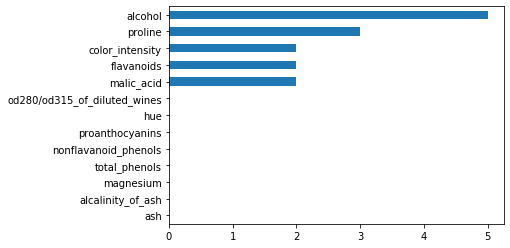%0A)

## XGBoost<a href="#XGBoost" class="anchor-link">¶</a>

### 함수<a href="#함수" class="anchor-link">¶</a>

#### 분류<a href="#분류" class="anchor-link">¶</a>

xgboost.XGBClassifier

-   eta \[default=0.3, alias: learning_rate\]: Step size shrinkage used
    in update to prevents overfitting. After each boosting step, we can
    directly get the weights of new features, and eta shrinks the
    feature weights to make the boosting process more conservative.
    range \[0, 1\]  
      

-   gamma \[default=0, alias: min_split_loss\]: Minimum loss reduction
    required to make a further partition on a leaf node of the tree. The
    larger gamma is, the more conservative the algorithm will be.  
      

-   max_depth \[default=6\]: Maximum depth of a tree. Increasing this
    value will make the model more complex and more likely to overfit. 0
    is only accepted in lossguided growing policy when tree_method is
    set as hist or gpu_hist and it indicates no limit on depth. Beware
    that XGBoost aggressively consumes memory when training a deep tree

#### 예측<a href="#예측" class="anchor-link">¶</a>

xgboost.XGBRegressor

In \[40\]:

    import xgboost as xgb
    model = xgb.XGBClassifier(eta = 0.3, gamma = 0.1, max_depth = 5).fit(b_Train_X, b_Train_Y)

Out\[40\]:

    array([1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
           1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1])

In \[41\]:

    model.feature_importances_

Out\[41\]:

    array([0.21912888, 0.01209357, 0.00706286, 0.01486303, 0.36680457,
           0.        , 0.05180991, 0.        , 0.        , 0.20509727,
           0.01629845, 0.        , 0.1068415 ], dtype=float32)

In \[42\]:

    pd.Series(model.feature_importances_,
              index = features_names).sort_values(ascending = True).plot(kind = "barh")

Out\[42\]:

    <matplotlib.axes._subplots.AxesSubplot at 0x227d2ce0f28>

![](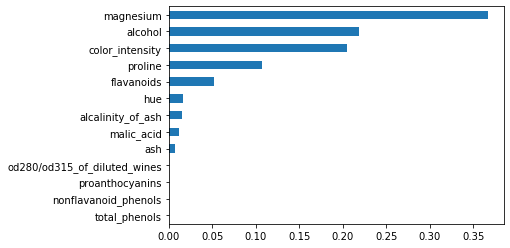%0A)

## Logistic Regression<a href="#Logistic-Regression" class="anchor-link">¶</a>

sklearn.linear_model.LogisticRegression(penalty='l2', \*, dual=False,
tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1,
class_weight=None, random_state=None, solver='lbfgs', max_iter=100,
multi_class='auto', verbose=0, warm_start=False, n_jobs=None,
l1_ratio=None)

주요 attributes

-   coef\_: ndarray of shape (1, n_features) or (n_classes, n*features)
    Coefficient of the features in the decision function. coef* is of
    shape (1, n_features) when the given problem is binary. In
    particular, when multi*class='multinomial', coef* corresponds to
    outcome 1 (True) and -coef\_ corresponds to outcome 0 (False).

-   intercept\_: ndarray of shape (1,) or (n_classes,) Intercept (a.k.a.
    bias) added to the decision function.

## k-NN<a href="#k-NN" class="anchor-link">¶</a>

sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, \*,
weights='uniform', algorithm='auto', leaf_size=30, p=2,
metric='minkowski', metric_params=None, n_jobs=None, \*\*kwargs)

sklearn.neighbors.KNeighborsRegressor(n_neighbors=5, \*,
weights='uniform', algorithm='auto', leaf_size=30, p=2,
metric='minkowski', metric_params=None, n_jobs=None, \*\*kwargs)

metric

-   “euclidean”
-   “manhattan”
-   “mahalanobis”
-   “jaccard”
-   “matching”

주요 메서드 (k-NN만의 메서드)

-   kneighbors(\[X, n_neighbors, return_distance\]): Finds the
    K-neighbors of a point.

## 의사결정나무<a href="#의사결정나무" class="anchor-link">¶</a>

### 함수<a href="#함수" class="anchor-link">¶</a>

sklearn.tree.DecisionTreeClassifier(\*, criterion='gini',
splitter='best', max_depth=None, min_samples_split=2,
min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None,
random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0,
min_impurity_split=None, class_weight=None, ccp_alpha=0.0)

sklearn.tree.DecisionTreeRegressor(\*, criterion='mse', splitter='best',
max_depth=None, min_samples_split=2, min_samples_leaf=1,
min_weight_fraction_leaf=0.0, max_features=None, random_state=None,
max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None,
class_weight=None, ccp_alpha=0.0)

### 특징 중요도 계산<a href="#특징-중요도-계산" class="anchor-link">¶</a>

In \[45\]:

    from sklearn.tree import DecisionTreeClassifier as DTC
    model = DTC().fit(b_Train_X, b_Train_Y)

In \[46\]:

    model.feature_importances_

Out\[46\]:

    array([0.70491129, 0.        , 0.        , 0.03453689, 0.        ,
           0.        , 0.        , 0.        , 0.        , 0.0869818 ,
           0.04324943, 0.01055294, 0.11976765])

### 시각화<a href="#시각화" class="anchor-link">¶</a>

sklearn.tree.plot_tree(decision_tree, \*, max_depth=None,
feature_names=None, class_names=None, label='all', filled=False,
impurity=True, node_ids=False, proportion=False, rotate='deprecated',
rounded=False, precision=3, ax=None, fontsize=None)

In \[52\]:

    from sklearn.tree import plot_tree
    from matplotlib import pyplot as plt
    fig = plt.figure(figsize = (10, 10))
    plot_tree(model, filled = True)
    plt.show()

![](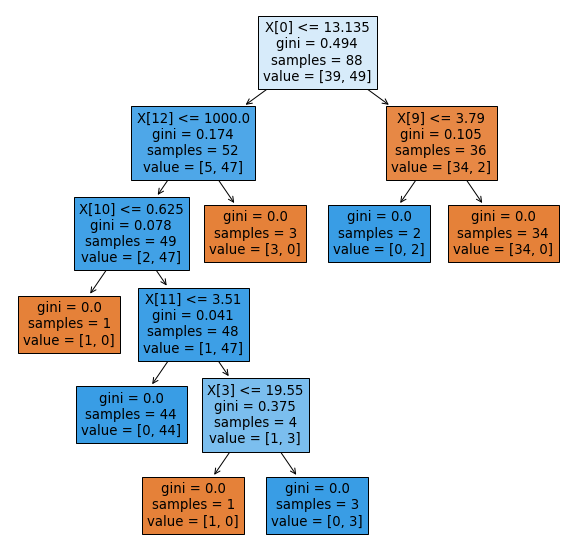%0A)

sklearn.tree.export_text(decision_tree, \*, feature_names=None,
max_depth=10, spacing=3, decimals=2, show_weights=False)

In \[57\]:

    from sklearn.tree import export_text
    from matplotlib import pyplot as plt
    print(export_text(model, feature_names = features_names))

    |--- alcohol <= 13.13
    |   |--- proline <= 1000.00
    |   |   |--- hue <= 0.62
    |   |   |   |--- class: 0
    |   |   |--- hue >  0.62
    |   |   |   |--- od280/od315_of_diluted_wines <= 3.51
    |   |   |   |   |--- class: 1
    |   |   |   |--- od280/od315_of_diluted_wines >  3.51
    |   |   |   |   |--- alcalinity_of_ash <= 19.55
    |   |   |   |   |   |--- class: 0
    |   |   |   |   |--- alcalinity_of_ash >  19.55
    |   |   |   |   |   |--- class: 1
    |   |--- proline >  1000.00
    |   |   |--- class: 0
    |--- alcohol >  13.13
    |   |--- color_intensity <= 3.79
    |   |   |--- class: 1
    |   |--- color_intensity >  3.79
    |   |   |--- class: 0

## 나이브베이즈<a href="#나이브베이즈" class="anchor-link">¶</a>

### 함수<a href="#함수" class="anchor-link">¶</a>

sklearn.naive_bayes.GaussianNB(\*, priors=None, var_smoothing=1e-09)

sklearn.naive_bayes.MultinomialNB(\*, alpha=1.0, fit_prior=True,
class_prior=None)

sklearn.naive_bayes.BernoulliNB(\*, alpha=1.0, binarize=0.0,
fit_prior=True, class_prior=None)

In \[65\]:

    from sklearn.naive_bayes import GaussianNB as GNB
    model = GNB(priors = [0.5, 0.5]).fit(b_Train_X, b_Train_Y)

## 신경망<a href="#신경망" class="anchor-link">¶</a>

### 함수<a href="#함수" class="anchor-link">¶</a>

class sklearn.neural_network.MLPClassifier(hidden_layer_sizes=100,
activation='relu', \*, solver='adam', alpha=0.0001, batch_size='auto',
learning_rate='constant', learning_rate_init=0.001, power_t=0.5,
max_iter=200, shuffle=True, random_state=None, tol=0.0001,
verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999,
epsilon=1e-08, n_iter_no_change=10, max_fun=15000)

class sklearn.neural_network.MLPRegressor(hidden_layer_sizes=100,
activation='relu', \*, solver='adam', alpha=0.0001, batch_size='auto',
learning_rate='constant', learning_rate_init=0.001, power_t=0.5,
max_iter=200, shuffle=True, random_state=None, tol=0.0001,
verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999,
epsilon=1e-08, n_iter_no_change=10, max_fun=15000)

주요 파라미터

-   hidden_layer_sizes: tuple, length = n_layers - 2, default=(100,) The
    ith element represents the number of neurons in the ith hidden
    layer.  
      

-   activation: {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’
    Activation function for the hidden layer.  
      

-   alpha: float, default=0.0001 L2 penalty (regularization term)
    parameter.  
      

-   batch_size: int, default=’auto’ Size of minibatches for stochastic
    optimizers. If the solver is ‘lbfgs’, the classifier will not use
    minibatch. When set to “auto”, batch_size=min(200, n_samples)  
      

-   learning_rate{‘constant’, ‘invscaling’, ‘adaptive’},
    default=’constant’ Learning rate schedule for weight updates.  
      

-   learning_rate_init: double, default=0.001 The initial learning rate
    used. It controls the step-size in updating the weights.  
      

# 평가 지표<a href="#평가-지표" class="anchor-link">¶</a>

In \[1\]:

    # 연습용 데이터 생성
    import numpy as np
    y_true = np.array([1,1,1,0,1,1,0,0,0,1,1])
    y_pred = np.array([1,1,1,1,1,1,0,0,0,0,0])

    # 다중 분류 결과
    y_true_M = np.array([1,1,1,0,1,1,0,0,0,1,1,2,2,2,2])
    y_pred_M = np.array([1,1,2,1,1,1,0,0,0,0,0,2,1,0,2])

## 혼동행렬<a href="#혼동행렬" class="anchor-link">¶</a>

In \[32\]:

    # confusion_matrix에서 label을 지정안하면 오름차순으로 정렬되서 만들어짐 
    import pandas as pd
    from sklearn.metrics import confusion_matrix
    values = confusion_matrix(y_true, y_pred)
    display(pd.DataFrame(values, columns = ["예측-0", "예측-1"], index = ["실제-0", "실제-1"]))
    tn, fp, fn, tp = values.ravel()

|        | 예측-0 | 예측-1 |
|--------|--------|--------|
| 실제-0 | 3      | 1      |
| 실제-1 | 2      | 5      |

## 정확도, 정밀도, 재현율, f1_score<a href="#정확도,-정밀도,-재현율,-f1_score" class="anchor-link">¶</a>

In \[37\]:

    # 이진 분류
    from sklearn.metrics import *
    acc = accuracy_score(y_true, y_pred)
    pre = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(acc, pre, rec, f1)

    0.7272727272727273 0.8333333333333334 0.7142857142857143 0.7692307692307692

In \[5\]:

    # 다중 분류: average 키워드 (micro, macro, weighted) 사용
    from sklearn.metrics import *
    acc = accuracy_score(y_true_M, y_pred_M)
    pre = precision_score(y_true_M, y_pred_M, average = "micro")
    rec = recall_score(y_true_M, y_pred_M, average = "macro")
    f1 = f1_score(y_true_M, y_pred_M, average = "weighted")

    print(acc, pre, rec, f1)

    0.6 0.6 0.6071428571428571 0.5995604395604396

## roc 커브 그리기<a href="#roc-커브-그리기" class="anchor-link">¶</a>

In \[86\]:

    from matplotlib import pyplot as plt
    from sklearn.metrics import plot_roc_curve
    from sklearn.svm import SVC

    model = SVC().fit(b_Train_X, b_Train_Y)
    plot_roc_curve(model, b_Test_X, b_Test_Y)

Out\[86\]:

    <sklearn.metrics._plot.roc_curve.RocCurveDisplay at 0x27c103fa240>

![](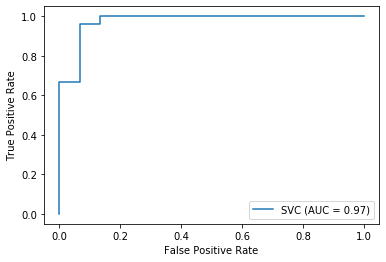%0A)

## auc score 계산<a href="#auc-score-계산" class="anchor-link">¶</a>

In \[91\]:

    from sklearn.metrics import roc_auc_score
    from sklearn.svm import SVC

    # 확률 계산이 가능할때만 auc score 계산 가능
    model = SVC(probability = True).fit(b_Train_X, b_Train_Y)

    # 아래는 같은 결과를 냄
    acu_score1 = roc_auc_score(b_Test_Y, model.predict_proba(b_Test_X)[:, 1])
    acu_score2 = roc_auc_score(b_Test_Y, model.decision_function(b_Test_X))

## precision_recall_curve<a href="#precision_recall_curve" class="anchor-link">¶</a>

In \[96\]:

    from sklearn.metrics import precision_recall_curve
    from sklearn.svm import SVC
    from matplotlib import pyplot as plt

    # 확률 계산이 가능할때만 auc score 계산 가능
    model = SVC(probability = True).fit(b_Train_X, b_Train_Y)
    score = model.predict_proba(b_Test_X)[:, 1]

    precision, recall, thresholds = precision_recall_curve(b_Test_Y, score)
    plt.plot(precision, recall)
    plt.xlim(0, 1)

Out\[96\]:

    (0, 1)

![](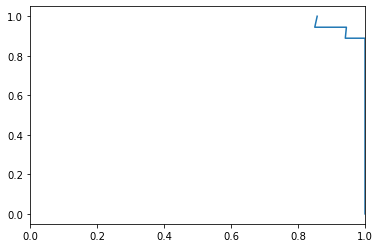%0A)

## MAE, MSE, MAPE<a href="#MAE,-MSE,-MAPE" class="anchor-link">¶</a>

In \[66\]:

    # 연습용 데이터 생성
    import numpy as np
    y_true = np.array([1,2,3,4,5])
    y_pred = np.array([1,2,3,5,6])

In \[67\]:

    # MAE
    from sklearn.metrics import mean_absolute_error as MAE
    print(MAE(y_true, y_pred))

    0.4

In \[68\]:

    # MSE
    from sklearn.metrics import mean_squared_error as MSE
    print(MSE(y_true, y_pred))

    0.4

## MAPE<a href="#MAPE" class="anchor-link">¶</a>

In \[71\]:

    import numpy as np
    def MAPE(y_true, y_pred): 
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print(MAPE(y_true, y_pred))

    9.0

# 파라미터 튜닝<a href="#파라미터-튜닝" class="anchor-link">¶</a>

In \[7\]:

    from sklearn.model_selection import ParameterGrid
    from sklearn.tree import DecisionTreeClassifier as DTC
    from sklearn.metrics import accuracy_score

    grid = {"max_depth": [1, 3, 5]}
    grid = ParameterGrid(grid)

    best_score = 0  
    for parameter in grid:
        model = DTC(**parameter).fit(Train_X, Train_Y) # 모델 학습
        pred_Y = model.predict(Test_X) # 평가 점수 저장
        score = accuracy_score(Test_Y, pred_Y)
        
        if score > best_score: # 현재 찾은 score가 현재까지 찾은 최고 점수보다 좋다면,
            print(parameter, score)
            best_score = score
            best_model = model

    {'max_depth': 1} 0.5512820512820513
    {'max_depth': 3} 0.8717948717948718

In \[ \]:

     

In \[ \]:

     

In \[ \]:

     

In \[ \]: